# Objetivo del análisis

Evaluar si existe una relación entre los promotores y las ventas totales del WOM. Los promotores realmente influencia en WOM sales?

# Descripción de los datos

Los datos fueron tomados de las simulaciones. Las variables son: WOM_sales, WOM_promoters y num_promoters. Los datos almacenados en las variables fueron tick a tick

# Creación del entorno

## Cargando paquetes

In [1]:
library(repr)
library("plyr", lib.loc="~/R/win-library/3.2")
library("pgirmess", lib.loc="~/R/win-library/3.2")

ERROR: Error in library("plyr", lib.loc = "~/R/win-library/3.2"): no library trees found in 'lib.loc'


In [2]:
library(repr)
library("plyr", lib.loc="~/R/win-library/3.3")
# library("nparcomp", lib.loc="~/R/win-library/3.3")
library("pgirmess", lib.loc="~/R/win-library/3.3")

## Funciones

In [3]:
options(repr.plot.width=5, repr.plot.height=4)

# Cargando los datos

## Simulaciones 10

In [4]:
Sim5 <- read.csv("Simulation5.csv", skip = 39, sep = ",")
Sim5$X.all.run.data. <- NULL
Sim10 <- read.csv("Simulation10.csv", skip = 39, sep = ",")
Sim10$X.all.run.data. <- NULL
Sim15 <- read.csv("Simulation15.csv", skip = 39, sep = ",")
Sim15$X.all.run.data. <- NULL
Sim20 <- read.csv("Simulation20.csv", skip = 39, sep = ",")
Sim20$X.all.run.data. <- NULL
Sim30 <- read.csv("Simulation30.csv", skip = 39, sep = ",")
Sim30$X.all.run.data. <- NULL
Sim40 <- read.csv("Simulation40.csv", skip = 39, sep = ",")
Sim40$X.all.run.data. <- NULL
Sim50 <- read.csv("Simulation50.csv", skip = 39, sep = ",")
Sim50$X.all.run.data. <- NULL

# Limpiando datos

## Creando dataframes de WOM sales 10 simulaciones

In [5]:
Sim5_WOM_sales <- Sim5[c(1, 4, 7, 10, 13, 16, 19, 22, 25, 28)]
Sim5_WOM_sales_sum <- colSums(Sim5_WOM_sales)
Sim5_WOM_sales_sum_df <- data.frame(Sim5_WOM_sales_sum)
colnames(Sim5_WOM_sales_sum_df) <-  "5%"
Sim5_WOM_sales_sum_df <- cbind(WOM_sales = rownames(Sim5_WOM_sales_sum_df), Sim5_WOM_sales_sum_df)
rownames(Sim5_WOM_sales_sum_df) <- NULL

Sim10_WOM_sales <- Sim10[c(1, 4, 7, 10, 13, 16, 19, 22, 25, 28)]
Sim10_WOM_sales_sum <- colSums(Sim10_WOM_sales)
Sim10_WOM_sales_sum_df <- data.frame(Sim10_WOM_sales_sum)
colnames(Sim10_WOM_sales_sum_df) <- "10%"
Sim10_WOM_sales_sum_df <- cbind(WOM_sales = rownames(Sim10_WOM_sales_sum_df), Sim10_WOM_sales_sum_df)
rownames(Sim10_WOM_sales_sum_df) <- NULL

Sim15_WOM_sales <- Sim15[c(1, 4, 7, 10, 13, 16, 19, 22, 25, 28)]
Sim15_WOM_sales_sum <- colSums(Sim15_WOM_sales)
Sim15_WOM_sales_sum_df <- data.frame(Sim15_WOM_sales_sum)
colnames(Sim15_WOM_sales_sum_df) <- "15%"
Sim15_WOM_sales_sum_df <- cbind(WOM_sales = rownames(Sim15_WOM_sales_sum_df), Sim15_WOM_sales_sum_df)
rownames(Sim15_WOM_sales_sum_df) <- NULL

Sim20_WOM_sales <- Sim20[c(1, 4, 7, 10, 13, 16, 19, 22, 25, 28)]
Sim20_WOM_sales_sum <- colSums(Sim20_WOM_sales)
Sim20_WOM_sales_sum_df <- data.frame(Sim20_WOM_sales_sum)
colnames(Sim20_WOM_sales_sum_df) <- "20%"
Sim20_WOM_sales_sum_df <- cbind(WOM_sales = rownames(Sim20_WOM_sales_sum_df), Sim20_WOM_sales_sum_df)
rownames(Sim20_WOM_sales_sum_df) <- NULL

Sim30_WOM_sales <- Sim30[c(1, 4, 7, 10, 13, 16, 19, 22, 25, 28)]
Sim30_WOM_sales_sum <- colSums(Sim30_WOM_sales)
Sim30_WOM_sales_sum_df <- data.frame(Sim30_WOM_sales_sum)
colnames(Sim30_WOM_sales_sum_df) <- "30%"
Sim30_WOM_sales_sum_df <- cbind(WOM_sales = rownames(Sim30_WOM_sales_sum_df), Sim30_WOM_sales_sum_df)
rownames(Sim30_WOM_sales_sum_df) <- NULL

Sim40_WOM_sales <- Sim40[c(1, 4, 7, 10, 13, 16, 19, 22, 25, 28)]
Sim40_WOM_sales_sum <- colSums(Sim40_WOM_sales)
Sim40_WOM_sales_sum_df <- data.frame(Sim40_WOM_sales_sum)
colnames(Sim40_WOM_sales_sum_df) <- "40%"
Sim40_WOM_sales_sum_df <- cbind(WOM_sales = rownames(Sim40_WOM_sales_sum_df), Sim40_WOM_sales_sum_df)
rownames(Sim40_WOM_sales_sum_df) <- NULL

Sim50_WOM_sales <- Sim50[c(1, 4, 7, 10, 13, 16, 19, 22, 25, 28)]
Sim50_WOM_sales_sum <- colSums(Sim50_WOM_sales)
Sim50_WOM_sales_sum_df <- data.frame(Sim50_WOM_sales_sum)
colnames(Sim50_WOM_sales_sum_df) <- "50%"
Sim50_WOM_sales_sum_df <- cbind(WOM_sales = rownames(Sim50_WOM_sales_sum_df), Sim50_WOM_sales_sum_df)
rownames(Sim50_WOM_sales_sum_df) <- NULL

## Uniendo dataframes

In [6]:
WOM_sales_10 <- Reduce(function(x, y) merge(x, y, , by = "WOM_sales", all = TRUE), 
    list(Sim5_WOM_sales_sum_df, Sim10_WOM_sales_sum_df, Sim15_WOM_sales_sum_df, Sim20_WOM_sales_sum_df, Sim30_WOM_sales_sum_df,
        Sim40_WOM_sales_sum_df, Sim50_WOM_sales_sum_df))
WOM_sales_10$WOM_sales <- NULL

# Estadística descriptiva

Se realizó un boxplot al WOM_sales de 10 simulaciones y los resultados muestran que para un 30% o superior de promotores los valores de WOM sales se incrementa en una proporción ilógica ya que el emprendedor tendría un % muy alto del mercado y esto no suele ocurrir.

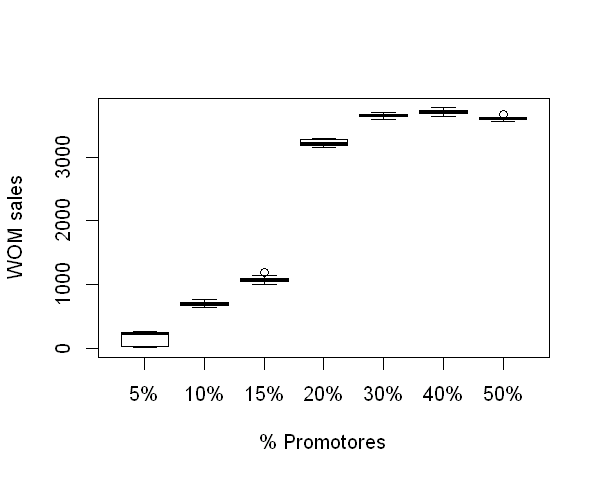

In [8]:
boxplot(WOM_sales_10, xlab= "% Promotores", ylab ="WOM sales")

In [10]:
setEPS()
postscript("Prom_Vs_WoM.eps")
boxplot(WOM_sales_10, xlab= "% Promotores", ylab ="WOM sales", main="WOM_sales_10")
dev.off()

pdf 
  2

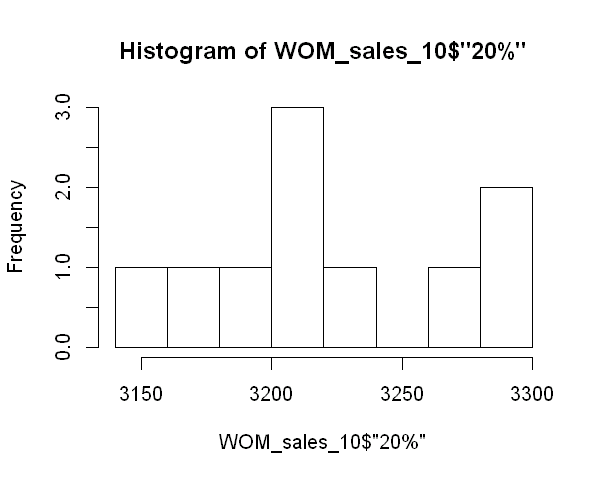

In [13]:
hist(WOM_sales_10$"20%")

## Media y desviación estandar del WOM sales para cada % de promotores

In [29]:
head(WOM_sales_10)

,5%,10%,15%,20%,30%,40%,50%
1,26,773,1095,3191,3644,3682,3610
2,223,668,1062,3287,3664,3755,3568
3,246,697,1192,3212,3633,3690,3619
4,239,670,1090,3156,3633,3773,3586
5,22,643,999,3277,3672,3734,3612
6,94,709,1092,3208,3645,3728,3614


In [30]:
WOM_sales_10_mean <- data.frame(colMeans(WOM_sales_10))
colnames(WOM_sales_10_mean) <- "media"
WOM_sales_10_mean <- cbind(nrpromoters = rownames(WOM_sales_10_mean), WOM_sales_10_mean)
WOM_sales_10_sd  <- data.frame(apply(WOM_sales_10, 2, sd))
colnames(WOM_sales_10_sd) <- "desv_est"
WOM_sales_10_sd <- cbind(nrpromoters = rownames(WOM_sales_10_sd), WOM_sales_10_sd)
WOM_sales_10_meansd <- merge(WOM_sales_10_mean, WOM_sales_10_sd, by = "nrpromoters")
WOM_sales_10_meansd

,nrpromoters,media,desv_est
1,10%,700.3,37.9504062341015
2,15%,1079.4,57.8430827517191
3,20%,3224,45.2401002061961
4,30%,3652.4,31.1276939931845
5,40%,3710.9,43.0721616721417
6,5%,163.2,111.796243228473
7,50%,3611.5,26.1034267652523


In [37]:
library(matrixStats)

In [39]:
WOM1<- as.matrix(WOM_sales_10)

In [41]:
WOM_median <- colMedians(WOM1)

In [42]:
head(WOM_median)

[1]  230.0  703.0 1076.0 3214.0 3648.0 3719.5

In [43]:
WOM_median1 <- as.data.frame(WOM_median)

In [44]:
WOM_median1

,WOM_median
1,230
2,703
3,1076
4,3214
5,3648
6,3719.5
7,3612.5


In [61]:
Promotores<- as.data.frame(c("5%", "10%", "15%", "20%", "30%", "40%", "50%") )

In [63]:
colnames(Promotores)<- "Promotores"

In [64]:
table_median <- cbind(WOM_median, Promotores)

In [65]:
table_median

,WOM_median,Promotores
1,230,5%
2,703,10%
3,1076,15%
4,3214,20%
5,3648,30%
6,3719.5,40%
7,3612.5,50%


# Estadística inferencial

## Se identifica la normalidad

Se aplica la prueba de Shapiro Wilk ya que son 10 datos por cada variable, se hicieron 10 simulaciones para cada porcentaje de promotores. Esto con el fin de determinar si los datos tienen una distribución normal.

In [15]:
shapiro.test(Sim5_WOM_sales_sum_df$"5%")


	Shapiro-Wilk normality test

data:  Sim5_WOM_sales_sum_df$"5%"
W = 0.79074, p-value = 0.01119


In [16]:
shapiro.test(Sim10_WOM_sales_sum_df$"10%")


	Shapiro-Wilk normality test

data:  Sim10_WOM_sales_sum_df$"10%"
W = 0.97273, p-value = 0.915


In [17]:
shapiro.test(Sim15_WOM_sales_sum_df$"15%")


	Shapiro-Wilk normality test

data:  Sim15_WOM_sales_sum_df$"15%"
W = 0.95288, p-value = 0.7027


In [18]:
shapiro.test(Sim20_WOM_sales_sum_df$"20%")


	Shapiro-Wilk normality test

data:  Sim20_WOM_sales_sum_df$"20%"
W = 0.9292, p-value = 0.44


De acuerdo a los resultados de la prueba shapiro wilk los datos de WOM sales solo son normales al 5%. Por lo tanto, se aplica la prueba de Kruskal Wallis para datos no paramétricos. Con esta prueba se identifica si hay una diferencia significativa entre las medianas. 

## Comparación de las medianas - Kruskal Wallis

Se crea una variable con todos los datos que tenga dos columnas: nrpromoters y WOM_sales

In [19]:
WOM5 <- data.frame(WOM_sales_10$"5%" , colnames = "5") 
colnames(WOM5) <- c("WOM_sales", "nrpromoters")

WOM10 <- data.frame(WOM_sales_10$"10%" , colnames = "10") 
colnames(WOM10) <- c("WOM_sales", "nrpromoters")

WOM15 <- data.frame(WOM_sales_10$"15%" , colnames = "15") 
colnames(WOM15) <- c("WOM_sales", "nrpromoters")

WOM20 <- data.frame(WOM_sales_10$"20%" , colnames = "20") 
colnames(WOM20) <- c("WOM_sales", "nrpromoters")

WOM_sales_all <- Reduce(function(x, y) merge(x, y, all = TRUE), 
    list(WOM5, WOM10, WOM15, WOM20))

In [20]:
kruskal.test(WOM_sales~nrpromoters, data = WOM_sales_all)


	Kruskal-Wallis rank sum test

data:  WOM_sales by nrpromoters
Kruskal-Wallis chi-squared = 36.589, df = 3, p-value = 5.622e-08


El p-value es menor a 0.001 por lo tanto existe una diferencia significativa entre las diferentes simulaciones. 

## Comparaciones múltiples en modelos no paramétricos

In [134]:
npar <- npar.t.test(WOM_sales~nrpromoters, data=WOM_test)


 #------Nonparametric Test Procedures and Confidence Intervals for relative  effects-----# 
 
 - Alternative Hypothesis:  True relative effect p is less or equal than 1/2 
 - Confidence level: 95 % 
 - Method = Logit - Transformation 
 
 #---------------------------Interpretation----------------------------------# 
 p(a,b) > 1/2 : b tends to be larger than a 
 #---------------------------------------------------------------------------# 
 


In [21]:
kruskalmc(WOM_sales~nrpromoters, data = WOM_sales_all) # True es 1, False es 0

ERROR: Error in vapply(seq_along(mapped), function(i) {: Los valores deben ser de longitud 1, 
pero el resultado FUN(X [[3]]) es la longitud 0 


,obs.dif,critical.dif,difference
5-10,10.00000,13.79315,0.00000
5-15,20.00000,13.79315,1.00000
5-20,30.00000,13.79315,1.00000
10-15,10.00000,13.79315,0.00000
10-20,20.00000,13.79315,1.00000
15-20,10.00000,13.79315,0.00000


In [22]:
coef(kruskalmc(WOM_sales~nrpromoters, data = WOM_sales_all))

NULL

# Test

In [26]:
WOM_sales_10 <- Reduce(function(x, y) merge(x, y, , by = "WOM_sales", all = TRUE), 
    list(Sim5_WOM_sales_sum_df, Sim10_WOM_sales_sum_df, Sim15_WOM_sales_sum_df))
WOM_sales_10$WOM_sales <- NULL

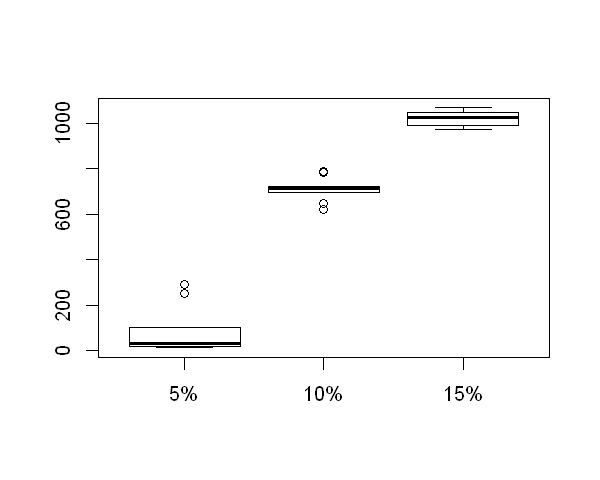

In [27]:
boxplot(WOM_sales_10)

In [1]:
WOM_sales_test <- Reduce(function(x, y) merge(x, y, , by = "WOM_sales", all = TRUE), 
    list(Sim5_WOM_sales_sum_df, Sim10_WOM_sales_sum_df, Sim15_WOM_sales_sum_df, Sim20_WOM_sales_sum_df))
WOM_sales_test$WOM_sales <- NULL

ERROR: Error in Reduce(function(x, y) merge(x, y, , by = "WOM_sales", all = TRUE), : objeto 'Sim5_WOM_sales_sum_df' no encontrado


# Anexos

# Cargando datos 

## Simulaciones 50

In [ ]:
Sim5_50 <- read.csv("Simulation5_50_sim.csv", skip = 39, sep = ",")
Sim5_50$X.all.run.data. <- NULL
Sim10_50 <- read.csv("Simulation10_50_sim.csv", skip = 39, sep = ",")
Sim10_50$X.all.run.data. <- NULL
Sim15_50 <- read.csv("Simulation15_50_sim.csv", skip = 39, sep = ",")
Sim15_50$X.all.run.data. <- NULL
Sim20_50 <- read.csv("Simulation20_50_sim.csv", skip = 39, sep = ",")
Sim20_50$X.all.run.data. <- NULL
Sim30_50 <- read.csv("Simulation30_50_sim.csv", skip = 39, sep = ",")
Sim30_50$X.all.run.data. <- NULL
Sim40_50 <- read.csv("Simulation40_50_sim.csv", skip = 39, sep = ",")
Sim40_50$X.all.run.data. <- NULL
Sim50_50 <- read.csv("Simulation50_50_sim.csv", skip = 39, sep = ",")
Sim50_50$X.all.run.data. <- NULL

## Simulaciones 100

In [ ]:
Sim5_100 <- read.csv("Simulation5_100_sim.csv", skip = 39, sep = ",")
Sim5_100$X.all.run.data. <- NULL
Sim10_100 <- read.csv("Simulation10_100_sim.csv", skip = 39, sep = ",")
Sim10_100$X.all.run.data. <- NULL
Sim15_100 <- read.csv("Simulation15_100_sim.csv", skip = 39, sep = ",")
Sim15_100$X.all.run.data. <- NULL
Sim20_100 <- read.csv("Simulation20_100_sim.csv", skip = 39, sep = ",")
Sim20_100$X.all.run.data. <- NULL
Sim30_100 <- read.csv("Simulation30_100_sim.csv", skip = 39, sep = ",")
Sim30_100$X.all.run.data. <- NULL
Sim40_100 <- read.csv("Simulation40_100_sim.csv", skip = 39, sep = ",")
Sim40_100$X.all.run.data. <- NULL
Sim50_100 <- read.csv("Simulation50_100_sim.csv", skip = 39, sep = ",")
Sim50_100$X.all.run.data. <- NULL

## Creando dataframes de WOM sales 50 simulaciones

In [ ]:
Sim5_50_WOM_sales <- Sim5_50[c(1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,64,67,70,73,76,79,82,85,88,91,94,
                                   97,100,103,106,109,112,115,118,121,124,127,130,133,136,139,142,145,148 )] 
Sim5_50_WOM_sales_sum <- colSums(Sim5_50_WOM_sales)
Sim5_50_WOM_sales_sum_df <- data.frame(Sim5_50_WOM_sales_sum)
colnames(Sim5_50_WOM_sales_sum_df) <- "5%"
Sim5_50_WOM_sales_sum_df <- cbind(WOM_sales = rownames(Sim5_50_WOM_sales_sum_df), Sim5_50_WOM_sales_sum_df)
rownames(Sim5_50_WOM_sales_sum_df) <- NULL

Sim10_50_WOM_sales <- Sim10_50[c(1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,64,67,70,73,76,79,82,85,88,91,94,
                                   97,100,103,106,109,112,115,118,121,124,127,130,133,136,139,142,145,148 )] 
Sim10_50_WOM_sales_sum <- colSums(Sim10_50_WOM_sales)
Sim10_50_WOM_sales_sum_df <- data.frame(Sim10_50_WOM_sales_sum)
colnames(Sim10_50_WOM_sales_sum_df) <- "10%"
Sim10_50_WOM_sales_sum_df <- cbind(WOM_sales = rownames(Sim10_50_WOM_sales_sum_df), Sim10_50_WOM_sales_sum_df)
rownames(Sim10_50_WOM_sales_sum_df) <- NULL

Sim15_50_WOM_sales <- Sim15_50[c(1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,64,67,70,73,76,79,82,85,88,91,94,
                                   97,100,103,106,109,112,115,118,121,124,127,130,133,136,139,142,145,148 )] 
Sim15_50_WOM_sales_sum <- colSums(Sim15_50_WOM_sales)
Sim15_50_WOM_sales_sum_df <- data.frame(Sim15_50_WOM_sales_sum)
colnames(Sim15_50_WOM_sales_sum_df) <- "15%"
Sim15_50_WOM_sales_sum_df <- cbind(WOM_sales = rownames(Sim15_50_WOM_sales_sum_df), Sim15_50_WOM_sales_sum_df)
rownames(Sim15_50_WOM_sales_sum_df) <- NULL

Sim20_50_WOM_sales <- Sim20_50[c(1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,64,67,70,73,76,79,82,85,88,91,94,
                                   97,100,103,106,109,112,115,118,121,124,127,130,133,136,139,142,145,148 )] 
Sim20_50_WOM_sales_sum <- colSums(Sim20_50_WOM_sales)
Sim20_50_WOM_sales_sum_df <- data.frame(Sim20_50_WOM_sales_sum)
colnames(Sim20_50_WOM_sales_sum_df) <- "20%"
Sim20_50_WOM_sales_sum_df <- cbind(WOM_sales = rownames(Sim20_50_WOM_sales_sum_df), Sim20_50_WOM_sales_sum_df)
rownames(Sim20_50_WOM_sales_sum_df) <- NULL

Sim30_50_WOM_sales <- Sim30_50[c(1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,64,67,70,73,76,79,82,85,88,91,94,
                                   97,100,103,106,109,112,115,118,121,124,127,130,133,136,139,142,145,148 )] 
Sim30_50_WOM_sales_sum <- colSums(Sim30_50_WOM_sales)
Sim30_50_WOM_sales_sum_df <- data.frame(Sim30_50_WOM_sales_sum)
colnames(Sim30_50_WOM_sales_sum_df) <- "30%"
Sim30_50_WOM_sales_sum_df <- cbind(WOM_sales = rownames(Sim30_50_WOM_sales_sum_df), Sim30_50_WOM_sales_sum_df)
rownames(Sim30_50_WOM_sales_sum_df) <- NULL

Sim40_50_WOM_sales <- Sim40_50[c(1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,64,67,70,73,76,79,82,85,88,91,94,
                                   97,100,103,106,109,112,115,118,121,124,127,130,133,136,139,142,145,148 )] 
Sim40_50_WOM_sales_sum <- colSums(Sim40_50_WOM_sales)
Sim40_50_WOM_sales_sum_df <- data.frame(Sim40_50_WOM_sales_sum)
colnames(Sim40_50_WOM_sales_sum_df) <- "40%"
Sim40_50_WOM_sales_sum_df <- cbind(WOM_sales = rownames(Sim40_50_WOM_sales_sum_df), Sim40_50_WOM_sales_sum_df)
rownames(Sim40_50_WOM_sales_sum_df) <- NULL

Sim50_50_WOM_sales <- Sim50_50[c(1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,64,67,70,73,76,79,82,85,88,91,94,
                                   97,100,103,106,109,112,115,118,121,124,127,130,133,136,139,142,145,148 )] 
Sim50_50_WOM_sales_sum <- colSums(Sim50_50_WOM_sales)
Sim50_50_WOM_sales_sum_df <- data.frame(Sim50_50_WOM_sales_sum)
colnames(Sim50_50_WOM_sales_sum_df) <- "50%"
Sim50_50_WOM_sales_sum_df <- cbind(WOM_sales = rownames(Sim50_50_WOM_sales_sum_df), Sim50_50_WOM_sales_sum_df)
rownames(Sim50_50_WOM_sales_sum_df) <- NULL

### Uniendo data frames

In [ ]:
WOM_sales_50 <- Reduce(function(x, y) merge(x, y, , by = "WOM_sales", all = TRUE), 
    list(Sim5_50_WOM_sales_sum_df, Sim10_50_WOM_sales_sum_df, Sim15_50_WOM_sales_sum_df, Sim20_50_WOM_sales_sum_df, 
         Sim30_50_WOM_sales_sum_df, Sim40_50_WOM_sales_sum_df, Sim50_50_WOM_sales_sum_df))
WOM_sales_50$WOM_sales <- NULL

## Creando dataframes de WOM sales 100 simulaciones

In [ ]:
Sim5_100_WOM_sales <- Sim5_100[c(1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,64,67,70,73,76,79,82,85,88,91,94,
                                   97,100,103,106,109,112,115,118,121,124,127,130,133,136,139,142,145,148,151,154,157,160,163,
                                   166,169,172,175,178,181,184,187,190,193,196,199,202,205,208,211,214,217,220,223,226,229,232,
                                   235,238,241,244,247,250,253,256,259,262,265,268,271,274,277,280,283,286,289,292,295,298 )] 
Sim5_100_WOM_sales_sum <- colSums(Sim5_100_WOM_sales)
Sim5_100_WOM_sales_sum_df <- data.frame(Sim5_100_WOM_sales_sum)
colnames(Sim5_100_WOM_sales_sum_df) <- "5%"
Sim5_100_WOM_sales_sum_df <- cbind(WOM_sales = rownames(Sim5_100_WOM_sales_sum_df), Sim5_100_WOM_sales_sum_df)
rownames(Sim5_100_WOM_sales_sum_df) <- NULL

Sim10_100_WOM_sales <- Sim10_100[c(1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,64,67,70,73,76,79,82,85,88,91,94,
                                   97,100,103,106,109,112,115,118,121,124,127,130,133,136,139,142,145,148,151,154,157,160,163,
                                   166,169,172,175,178,181,184,187,190,193,196,199,202,205,208,211,214,217,220,223,226,229,232,
                                   235,238,241,244,247,250,253,256,259,262,265,268,271,274,277,280,283,286,289,292,295,298 )] 
Sim10_100_WOM_sales_sum <- colSums(Sim10_100_WOM_sales)
Sim10_100_WOM_sales_sum_df <- data.frame(Sim10_100_WOM_sales_sum)
colnames(Sim10_100_WOM_sales_sum_df) <- "10%"
Sim10_100_WOM_sales_sum_df <- cbind(WOM_sales = rownames(Sim10_100_WOM_sales_sum_df), Sim10_100_WOM_sales_sum_df)
rownames(Sim10_100_WOM_sales_sum_df) <- NULL

Sim15_100_WOM_sales <- Sim15_100[c(1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,64,67,70,73,76,79,82,85,88,91,94,
                                   97,100,103,106,109,112,115,118,121,124,127,130,133,136,139,142,145,148,151,154,157,160,163,
                                   166,169,172,175,178,181,184,187,190,193,196,199,202,205,208,211,214,217,220,223,226,229,232,
                                   235,238,241,244,247,250,253,256,259,262,265,268,271,274,277,280,283,286,289,292,295,298 )] 
Sim15_100_WOM_sales_sum <- colSums(Sim15_100_WOM_sales)
Sim15_100_WOM_sales_sum_df <- data.frame(Sim15_100_WOM_sales_sum)
colnames(Sim15_100_WOM_sales_sum_df) <- "15%"
Sim15_100_WOM_sales_sum_df <- cbind(WOM_sales = rownames(Sim15_100_WOM_sales_sum_df), Sim15_100_WOM_sales_sum_df)
rownames(Sim15_100_WOM_sales_sum_df) <- NULL

Sim20_100_WOM_sales <- Sim20_100[c(1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,64,67,70,73,76,79,82,85,88,91,94,
                                   97,100,103,106,109,112,115,118,121,124,127,130,133,136,139,142,145,148,151,154,157,160,163,
                                   166,169,172,175,178,181,184,187,190,193,196,199,202,205,208,211,214,217,220,223,226,229,232,
                                   235,238,241,244,247,250,253,256,259,262,265,268,271,274,277,280,283,286,289,292,295,298 )] 
Sim20_100_WOM_sales_sum <- colSums(Sim20_100_WOM_sales)
Sim20_100_WOM_sales_sum_df <- data.frame(Sim20_100_WOM_sales_sum)
colnames(Sim20_100_WOM_sales_sum_df) <- "20%"
Sim20_100_WOM_sales_sum_df <- cbind(WOM_sales = rownames(Sim20_100_WOM_sales_sum_df), Sim20_100_WOM_sales_sum_df)
rownames(Sim20_100_WOM_sales_sum_df) <- NULL

Sim30_100_WOM_sales <- Sim30_100[c(1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,64,67,70,73,76,79,82,85,88,91,94,
                                   97,100,103,106,109,112,115,118,121,124,127,130,133,136,139,142,145,148,151,154,157,160,163,
                                   166,169,172,175,178,181,184,187,190,193,196,199,202,205,208,211,214,217,220,223,226,229,232,
                                   235,238,241,244,247,250,253,256,259,262,265,268,271,274,277,280,283,286,289,292,295,298 )] 
Sim30_100_WOM_sales_sum <- colSums(Sim30_100_WOM_sales)
Sim30_100_WOM_sales_sum_df <- data.frame(Sim30_100_WOM_sales_sum)
colnames(Sim30_100_WOM_sales_sum_df) <- "30%"
Sim30_100_WOM_sales_sum_df <- cbind(WOM_sales = rownames(Sim30_100_WOM_sales_sum_df), Sim30_100_WOM_sales_sum_df)
rownames(Sim30_100_WOM_sales_sum_df) <- NULL

Sim40_100_WOM_sales <- Sim40_100[c(1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,64,67,70,73,76,79,82,85,88,91,94,
                                   97,100,103,106,109,112,115,118,121,124,127,130,133,136,139,142,145,148,151,154,157,160,163,
                                   166,169,172,175,178,181,184,187,190,193,196,199,202,205,208,211,214,217,220,223,226,229,232,
                                   235,238,241,244,247,250,253,256,259,262,265,268,271,274,277,280,283,286,289,292,295,298 )] 
Sim40_100_WOM_sales_sum <- colSums(Sim40_100_WOM_sales)
Sim40_100_WOM_sales_sum_df <- data.frame(Sim40_100_WOM_sales_sum)
colnames(Sim40_100_WOM_sales_sum_df) <- "40%"
Sim40_100_WOM_sales_sum_df <- cbind(WOM_sales = rownames(Sim40_100_WOM_sales_sum_df), Sim40_100_WOM_sales_sum_df)
rownames(Sim40_100_WOM_sales_sum_df) <- NULL

Sim50_100_WOM_sales <- Sim50_100[c(1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,64,67,70,73,76,79,82,85,88,91,94,
                                   97,100,103,106,109,112,115,118,121,124,127,130,133,136,139,142,145,148,151,154,157,160,163,
                                   166,169,172,175,178,181,184,187,190,193,196,199,202,205,208,211,214,217,220,223,226,229,232,
                                   235,238,241,244,247,250,253,256,259,262,265,268,271,274,277,280,283,286,289,292,295,298 )] 
Sim50_100_WOM_sales_sum <- colSums(Sim50_100_WOM_sales)
Sim50_100_WOM_sales_sum_df <- data.frame(Sim50_100_WOM_sales_sum)
colnames(Sim50_100_WOM_sales_sum_df) <- "50%"
Sim50_100_WOM_sales_sum_df <- cbind(WOM_sales = rownames(Sim50_100_WOM_sales_sum_df), Sim50_100_WOM_sales_sum_df)
rownames(Sim50_100_WOM_sales_sum_df) <- NULL

### Uniendo data frames

In [ ]:
WOM_sales_100 <- Reduce(function(x, y) merge(x, y, , by = "WOM_sales", all = TRUE), 
    list(Sim5_100_WOM_sales_sum_df, Sim10_100_WOM_sales_sum_df, Sim15_100_WOM_sales_sum_df, Sim20_100_WOM_sales_sum_df, 
         Sim30_100_WOM_sales_sum_df, Sim40_100_WOM_sales_sum_df, Sim50_100_WOM_sales_sum_df))
WOM_sales_100$WOM_sales <- NULL

# Análisis de sensibilidad

# Simulaciones

Se pueden comparar simulaciones de 10 entre ellas o también realizar simulaciones a 10, 20, 30, 40, 50 y revisar cuando se estabilizan los datos

## Promoters %

De acuerdo al boxplot, un número mayor al 20% genera condiciones en el mercado irreales

In [7]:
boxplot(WOM_sales)
title("10 Simulaciones")

ERROR: Error in boxplot(WOM_sales): objeto 'WOM_sales' no encontrado


In [9]:
boxplot(WOM_sales_50)
title("50 Simulaciones")

ERROR: Error in boxplot(WOM_sales_50): objeto 'WOM_sales_50' no encontrado


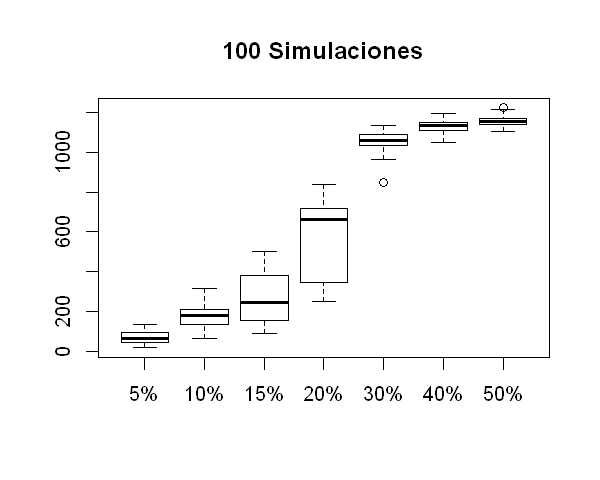

In [160]:
boxplot(WOM_sales_100)
title("100 Simulaciones")

## Ticks